# Proyek Analisis Data: E-commerce Public
- **Nama:** rahayukartikasari12@gmail.com
- **ID Dicoding:** rahayu_kartika_sari

## Menentukan Pertanyaan Bisnis

- Kategori produk apa saja yang paling banyak terjual per tahun?
- Kapan rentang waktu (contoh: pagi, siang, sore) dimana terjadi banyak pembelian?
- Lokasi manakah yang paling banyak melakukan pembelian?
- Bagaimana performa penjualan beberapa bulan terakhir? 
- Siapakah pembeli terbaik?

## Import Semua Packages/Library yang Digunakan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
customers = pd.read_csv("data/customers_dataset.csv")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [3]:
geolocation = pd.read_csv("data/geolocation_dataset.csv")
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [4]:
order_items = pd.read_csv("data/order_items_dataset.csv")
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [5]:
order_payments = pd.read_csv("data/order_payments_dataset.csv")
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [6]:
order_reviews = pd.read_csv("data/order_reviews_dataset.csv")
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [7]:
orders = pd.read_csv("data/orders_dataset.csv")
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [8]:
product_categories = pd.read_csv("data/product_category_name_translation.csv")
product_categories.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [9]:
products = pd.read_csv("data/products_dataset.csv")
products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers = pd.read_csv("data/sellers_dataset.csv")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

#### Customers

In [11]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [12]:
customers.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,274fa6071e5e17fe303b9748641082c8,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [13]:
customers.isna().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [14]:
print("Jumlah duplikasi: ", customers.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ditemukan data yang ganjil, null, atau terduplikasi
- Data sudah dapat digunakan untuk analysis

#### Geolocation

In [15]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [16]:
geolocation.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


In [17]:
geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [18]:
print("Jumlah duplikasi: ", geolocation.duplicated().sum())

Jumlah duplikasi:  261831


**Insight:**
- Tidak ditemukan data yang ganjil, null
- Ditemukan 261831 duplikasi data

#### Order Items

In [19]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [20]:
order_items.describe(include="all")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


In [21]:
order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [22]:
print("Jumlah duplikasi: ", order_items.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ditemukan data yang ganjil, null, atau terduplikasi
- Data shipping_limit_date tidak seharusnya berupa object tetapi date

#### Order Payments

In [23]:
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [24]:
order_payments.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [25]:
order_payments.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [26]:
print("Jumlah duplikasi: ", order_payments.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ditemukan data yang ganjil, null, atau terduplikasi
- Data dapat langsung digunakan untuk analysis

#### Order Reviews

In [27]:
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [28]:
order_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [29]:
order_reviews.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [30]:
print("Jumlah duplikasi: ", order_reviews.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ditemukan data yang ganjil, atau terduplikasi
- Ditemukan data yang memiliki missing value
- Column review_creation_date dan review_answer_timestamp seharusnya bertipe datetime

#### Orders

In [31]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [32]:
orders.describe(include="all")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,66dea50a8b16d9b4dee7af250b4be1a5,edb027a75a1449115f6b43211ae02a24,delivered,2018-08-02 12:05:26,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 19:36:48,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [33]:
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [34]:
print("Jumlah duplikasi: ", orders.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ditemukan data yang ganjil, atau terduplikasi
- Ditemukan adanya data yang memiliki missing value
- Data order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date seharusnya bertipe date time

#### Product Categories

In [35]:
product_categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [36]:
product_categories.describe(include="all")

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


In [37]:
product_categories.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [38]:
print("Jumlah duplikasi: ", product_categories.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ditemukan data yang ganjil, null, atau terduplikasi
- Data dapat digunakan untuk analysis

#### Products

In [39]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [40]:
products.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,106392145fca363410d287a815be6de4,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


In [41]:
products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [42]:
print("Jumlah duplikasi: ", products.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ditemukan data yang ganjil atau terduplikasi
- Terdapat data dengan missing value

#### Sellers

In [43]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [44]:
sellers.describe(include="all")

,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,9e25199f6ef7e7c347120ff175652c3b,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


In [45]:
sellers.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

In [46]:
print("Jumlah duplikasi: ", sellers.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Tidak ditemukan data yang ganjil, null, atau terduplikasi
- Data dapat digunakan untuk analysis

### Cleaning Data

Pada tabel geolocation_df tidak dilakukan drop pada duplikat dikarenakan adanya kemungkinan duplikasi terjadi di kolom sao paulo (SP). 

Pada tabel order_review_df juga tidak dilakukan drop table pada data yang memiliki missing value di kolom review_comment_title dan review_comment_message dikarenakan dalam analysis yang dilakukan, data pada kolom itu kurang diperlukan dan data lainnya yaitu rating_score diperlukan

Karena ditemukan adanya missing value di tabel order_df pada column order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date, maka dilakukan dropping. Selain itu, dikarenakan terdapat data order yang terhapus, dilakukan juga dropping pada tabel order_items karena berkolerasi dengan tabel orders

In [47]:
# Mengidentifikasi data orders yang perlu dilakukan dropping
orders_to_drop = orders[orders.isna()]

# Melakukan droppping pada tabel orders
orders.dropna(inplace=True)

# Melakukan dropping pada data order_items yang berkolerasi
order_items.drop(order_items[order_items["order_id"].isin(orders_to_drop["order_id"])].index)

# Mengecek jumlah missing value di tabel order
orders.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

Karena ditemukan adanya missing value di tabel products maka dilakukan dropping.

In [48]:
# Melakukan dropping pada missing value
products.dropna(inplace=True)

# Mengecek jumlah missing value di tabel order
products.isna().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

Selanjutnya dilakukan penyesuaian tipe data pada kolom yang diperlukan

In [49]:
# Mengidentifikasi column yang perlu diubah menjadi date di tabel order_items
datetime = ["shipping_limit_date"]

# Mengganti tipe data menjadi date
for column in datetime:
  order_items[column] = pd.to_datetime(order_items[column])

# Mengecek perubahan tipe data
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [50]:
# Mengidentifikasi column yang perlu diubah menjadi date di tabel order_reviews
datetime = ["review_creation_date", "review_answer_timestamp"]

# Mengganti tipe data menjadi date
for column in datetime:
  order_reviews[column] = pd.to_datetime(order_reviews[column])

# Mengecek perubahan tipe data
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [51]:
# Mengidentifikasi column yang perlu diubah menjadi date di tabel orders
datetime = ["order_purchase_timestamp","order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

# Mengganti tipe data menjadi date
for column in datetime:
  orders[column] = pd.to_datetime(orders[column])
    
# Mengecek perubahan tipe data
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


Dilakukan juga, dropping kolom yang kurang diperlukan

In [52]:
# Menghapus kolom yang kurang diperlukan di orders
orders.drop([
    'order_delivered_carrier_date', 
    'order_delivered_customer_date',
    ], 
    axis=1, inplace=True)

# Mengecek perubahan
orders.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(3)
memory usage: 5.2+ MB


In [53]:
# Menghapus kolom yang kurang diperlukan di products
products.drop([
    'product_name_lenght', 'product_description_lenght', 
    'product_photos_qty', 'product_weight_g', 
    'product_length_cm', 'product_height_cm',
    'product_width_cm',
    ], 
    axis=1, inplace=True)

# Mengecek perubahan
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32340 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32340 non-null  object
 1   product_category_name  32340 non-null  object
dtypes: object(2)
memory usage: 758.0+ KB


In [54]:
# Menghapus kolom yang kurang diperlukan di order_items
order_items.drop([
    'shipping_limit_date', 'freight_value',
    ], 
    axis=1, inplace=True)

# Mengecek perubahan 
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       112650 non-null  object 
 1   order_item_id  112650 non-null  int64  
 2   product_id     112650 non-null  object 
 3   seller_id      112650 non-null  object 
 4   price          112650 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 4.3+ MB


In [55]:
# Menghapus kolom yang kurang diperlukan di order_payments
order_payments.drop([
    'payment_sequential',
    'payment_installments'	
    ], 
    axis=1, inplace=True)

# Mengecek perubahan
order_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   order_id       103886 non-null  object 
 1   payment_type   103886 non-null  object 
 2   payment_value  103886 non-null  float64
dtypes: float64(1), object(2)
memory usage: 2.4+ MB


In [56]:
# Menghapus kolom yang kurang diperlukan di order_reviews
order_reviews.drop([
    'review_comment_title',
    'review_comment_message'	
    ], 
    axis=1, inplace=True)

# Mengecek perubahan
order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_creation_date     99224 non-null  datetime64[ns]
 4   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 3.8+ MB


**Insight:**
- Data yang memiliki nilai null sudah dilakukan dropping
- Data sudah disesuaikan tipe data nya
- Kolom yang kurang diperlukan sudah dilakukan dropping

## Exploratory Data Analysis (EDA)

##### all_df

In [57]:
# Menggabungkan tabel orders dan order_payments
all_df = pd.merge(
    left=orders,
    right=order_payments,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Menggabungkan tabel all_df dan customers
all_df = pd.merge(
    left=all_df,
    right=customers,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)
# Menggabungkan tabel all_df dan order_reviews
all_df = pd.merge(
    left=all_df,
    right=order_reviews,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Menggabungkan tabel product dan product_categories
products_df = pd.merge(
    left=products,
    right=product_categories,
    how="left",
    left_on="product_category_name",
    right_on="product_category_name"
)

# Menggabungkan tabel all_df, dan order_items
all_df = pd.merge(
    left=order_items,
    right=all_df,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Menggabungkan tabel all_df dan products_df
all_df = pd.merge(
    left=all_df,
    right=products_df,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

# Melihat hasil penggabungan
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118176 entries, 0 to 118175
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118176 non-null  object        
 1   order_item_id                  118176 non-null  int64         
 2   product_id                     118176 non-null  object        
 3   seller_id                      118176 non-null  object        
 4   price                          118176 non-null  float64       
 5   customer_id                    115706 non-null  object        
 6   order_status                   115706 non-null  object        
 7   order_purchase_timestamp       115706 non-null  datetime64[ns]
 8   order_approved_at              115706 non-null  datetime64[ns]
 9   order_estimated_delivery_date  115706 non-null  datetime64[ns]
 10  payment_type                   115703 non-null  object        
 11  

### Kategori produk yang paling banyak terjual per tahun

In [58]:
# Mengambil data tahun pembelian dari kolom order_approved_at dan ditambahkan ke kolom baru
all_df['order_year'] = all_df['order_approved_at'].dt.year

# Melihat data terbaru
all_df.head()

,order_id,order_item_id,product_id,seller_id,price,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,...,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_creation_date,review_answer_timestamp,product_category_name,product_category_name_english,order_year
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-29,...,28013.0,campos dos goytacazes,RJ,97ca439bc427b48bc1cd7177abe71365,5.0,2017-09-21,2017-09-22 10:57:03,cool_stuff,cool_stuff,2017.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-15,...,15775.0,santa fe do sul,SP,7b07bacd811c4117b742569b04ce3580,4.0,2017-05-13,2017-05-15 11:34:13,pet_shop,pet_shop,2017.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-02-05,...,35661.0,para de minas,MG,0c5b33dea94867d1ac402749e5438e8b,5.0,2018-01-23,2018-01-23 16:06:31,moveis_decoracao,furniture_decor,2018.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-20,...,12952.0,atibaia,SP,f4028d019cb58564807486a6aaf33817,4.0,2018-08-15,2018-08-15 16:39:01,perfumaria,perfumery,2018.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-03-17,...,13226.0,varzea paulista,SP,940144190dcba6351888cafa43f3a3a5,5.0,2017-03-02,2017-03-03 10:54:59,ferramentas_jardim,garden_tools,2017.0


In [59]:
# Melakukan filter pada order yang berstatus "delivered" 
delivered_orders_df = all_df[all_df['order_status'] == 'delivered']

# Melihat hasil filter
delivered_orders_df.head()

,order_id,order_item_id,product_id,seller_id,price,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,...,customer_zip_code_prefix,customer_city,customer_state,review_id,review_score,review_creation_date,review_answer_timestamp,product_category_name,product_category_name_english,order_year
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-29,...,28013.0,campos dos goytacazes,RJ,97ca439bc427b48bc1cd7177abe71365,5.0,2017-09-21,2017-09-22 10:57:03,cool_stuff,cool_stuff,2017.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-15,...,15775.0,santa fe do sul,SP,7b07bacd811c4117b742569b04ce3580,4.0,2017-05-13,2017-05-15 11:34:13,pet_shop,pet_shop,2017.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-02-05,...,35661.0,para de minas,MG,0c5b33dea94867d1ac402749e5438e8b,5.0,2018-01-23,2018-01-23 16:06:31,moveis_decoracao,furniture_decor,2018.0
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-20,...,12952.0,atibaia,SP,f4028d019cb58564807486a6aaf33817,4.0,2018-08-15,2018-08-15 16:39:01,perfumaria,perfumery,2018.0
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-03-17,...,13226.0,varzea paulista,SP,940144190dcba6351888cafa43f3a3a5,5.0,2017-03-02,2017-03-03 10:54:59,ferramentas_jardim,garden_tools,2017.0


In [60]:
# Mengelompokkan berdasarkan product_category_name_english dan order_year, menghitung jumlah order yang terjadi
yearly_category_counts = delivered_orders_df.groupby(['order_year', 'product_category_name_english'])['order_id'].count().reset_index(name='order_count')

# Mencari 5 kategori paling banyak terjual per tahun
top_categories = yearly_category_counts.groupby('order_year').head(5).reset_index(drop=True).sort_values(by=['order_year', 'order_count'], ascending=[False, False])
top_categories.groupby(by=["order_year", "product_category_name_english"]).agg({
    "order_count": "sum"
})

order_count
order_year product_category_name_english             
2016.0     air_conditioning                         8
           audio                                    2
           auto                                     8
           baby                                    11
           bed_bath_table                           8
2017.0     agro_industry_and_commerce              63
           air_conditioning                       131
           art                                     38
           arts_and_craftmanship                    2
           audio                                  175
2018.0     agro_industry_and_commerce             183
           air_conditioning                       155
           art                                    169
           arts_and_craftmanship                   22
           audio                                  202

In [61]:
# Buat menjadi tahun per tahun
top_2016 = top_categories[top_categories['order_year'] == 2016].groupby(by=["order_year", "product_category_name_english"]).agg({
    "order_count": "sum"
}).sort_values(by="order_count", ascending=False)

top_2017 = top_categories[top_categories['order_year'] == 2017].groupby(by=["order_year", "product_category_name_english"]).agg({
    "order_count": "sum"
}).sort_values(by="order_count", ascending=False)

top_2018 = top_categories[top_categories['order_year'] == 2018].groupby(by=["order_year", "product_category_name_english"]).agg({
    "order_count": "sum"
}).sort_values(by="order_count", ascending=False)

**Insight:**
- 5 Kategori produk yang paling banyak terjual di tahun 2018 yaitu: 1) Audio, 2) Art, 3) air_conditioning, 4) agro_industry_and_commerce, 5) arts_and_craftmanship
- 5 Kategori produk yang paling banyak terjual di tahun 2017 yaitu: 1) Audio, 2) air_conditioning, 3) agro_industry_and_commerce, 4)art, 5) arts_and_craftmanship
- 5 Kategori produk yang paling banyak terjual di tahun 2016 yaitu: 1) Baby, 2) air_conditioning, 3)  4) agro_industry_and_commerce, 5)

### Rentang waktu khusus (contoh: pagi, siang, sore) dimana terjadi banyak pembelian

In [62]:
# Mengidentifikasi jam order
all_df['order_hour']= all_df['order_purchase_timestamp'].dt.hour

# Mendefinisikan kelompok waktu
time_bins = [0, 6, 12, 18, 24]
time_labels = ['Night', 'Morning', 'Afternoon', 'Evening']

# Mengidentifikasi kelompok waktu pembelian dari data order
all_df['order_period'] = pd.cut(all_df['order_hour'], bins=time_bins, labels=time_labels, right=False)

# Melihat data
all_df.head()

,order_id,order_item_id,product_id,seller_id,price,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_estimated_delivery_date,...,customer_state,review_id,review_score,review_creation_date,review_answer_timestamp,product_category_name,product_category_name_english,order_year,order_hour,order_period
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,58.90,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-29,...,RJ,97ca439bc427b48bc1cd7177abe71365,5.0,2017-09-21,2017-09-22 10:57:03,cool_stuff,cool_stuff,2017.0,8.0,Morning
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,239.90,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-15,...,SP,7b07bacd811c4117b742569b04ce3580,4.0,2017-05-13,2017-05-15 11:34:13,pet_shop,pet_shop,2017.0,10.0,Morning
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,199.00,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-02-05,...,MG,0c5b33dea94867d1ac402749e5438e8b,5.0,2018-01-23,2018-01-23 16:06:31,moveis_decoracao,furniture_decor,2018.0,14.0,Afternoon
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,12.99,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-20,...,SP,f4028d019cb58564807486a6aaf33817,4.0,2018-08-15,2018-08-15 16:39:01,perfumaria,perfumery,2018.0,10.0,Morning
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,199.90,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-03-17,...,SP,940144190dcba6351888cafa43f3a3a5,5.0,2017-03-02,2017-03-03 10:54:59,ferramentas_jardim,garden_tools,2017.0,13.0,Afternoon


In [63]:
# Mengelompokkan berdasarkan periode waktu pembelian dan dihitung jumlahnya
order_count_by_period = all_df.groupby('order_period', observed=False)['order_id'].count().reset_index(name='order_count')

# Mengelompokkan berdasarkan jam waktu pembelian dan dihitung jumlahnya
order_count_by_hour = all_df.groupby('order_hour', observed=False)['order_id'].count().reset_index(name='order_count')

print(order_count_by_period)
print(order_count_by_hour)

  order_period  order_count
0        Night         5560
1      Morning        25842
2    Afternoon        44813
3      Evening        39491
    order_hour  order_count
0          0.0         2856
1          1.0         1320
2          2.0          602
3          3.0          309
4          4.0          253
5          5.0          220
6          6.0          548
7          7.0         1391
8          8.0         3483
9          9.0         5567
10        10.0         7209
11        11.0         7644
12        12.0         7018
13        13.0         7549
14        14.0         7793
15        15.0         7490
16        16.0         7840
17        17.0         7123
18        18.0         6738
19        19.0         6873
20        20.0         7122
21        21.0         7116
22        22.0         6827
23        23.0         4815


**Insight:**
- Rentang waktu yang paling banyak terjadi penjualan yaitu ketika siang hari
- Aktifitas pembelian pada pukul 10.00 hingga 22.00 cenderung tinggi

### Lokasi manakah yang paling banyak melakukan pembelian?

In [64]:
# Mengelompokkan konsumen berdasarkan kota dan dihitung jumlah pembeliannya kemudian diurutkan dari yang terbanyak
count_order_by_city = all_df.groupby(['customer_city', 'customer_state'], observed=False)['order_id'].count().reset_index(name='order_count')
count_order_by_city.sort_values(by="order_count", ascending=False).head(10)

,customer_city,customer_state,order_count
3721,sao paulo,SP,18299
3250,rio de janeiro,RJ,8004
465,belo horizonte,MG,3214
582,brasilia,DF,2431
1179,curitiba,PR,1792
732,campinas,SP,1714
3050,porto alegre,RS,1625
3343,salvador,BA,1483
1576,guarulhos,SP,1366
3541,sao bernardo do campo,SP,1102


In [65]:
# Mengelompokkan konsumen berdasarkan kota dan dihitung jumlah pembeliannya kemudian diurutkan dari yang terbanyak
count_order_by_state = all_df.groupby('customer_state', observed=False)['order_id'].count().reset_index(name='order_count')
count_order_by_state.sort_values(by="order_count", ascending=False).head(10)

,customer_state,order_count
25,SP,48805
18,RJ,14963
10,MG,13494
22,RS,6428
17,PR,5894
23,SC,4240
4,BA,3950
6,DF,2447
8,GO,2395
7,ES,2318


**Insight:**
- Kota yang paling banyak melakukan pembelian yaitu Sao Paulo (SP)
- Wilayah yang paling banyak melakukan pembelian yaitu Sao Paulo (SP)

### Bagaimana performa penjualan beberapa bulan terakhir? 

In [96]:
# Membuat tabel monthly_orders_df untuk menampung data penjualan perbulan tahun 2018
monthly_orders_df = all_df[all_df['order_year'] == 2018]
monthly_orders_df = monthly_orders_df.resample(rule='ME', on='order_approved_at').agg({
    "order_id": "nunique",
    "payment_value": "sum"
})

# Mengubah format order_date menjadi nama bulan
monthly_orders_df.index = monthly_orders_df.index.strftime('%B')
monthly_orders_df = monthly_orders_df.reset_index()

# Mengganti nama kolom
monthly_orders_df.rename(columns={
    "order_approved_at" : "month",
    "order_id": "order_count",
    "total_price": "revenue"
}, inplace=True)

# Menampilkan data
monthly_orders_df

,month,order_count,payment_value
0,January,6991,1365414.28
1,February,6537,1283538.05
2,March,7083,1456876.07
3,April,6639,1445028.24
4,May,6940,1515782.32
5,June,6094,1293034.20
6,July,6047,1283218.33
7,August,6504,1246903.16


**Insight:**
- Penjualan beberapa bulan terakhir cenderung stabil
- Penjualan bulan terakhir sudah mengalami kenaikan dari bulan sebelumnya (Juli)

### Siapakah pembeli terbaik?

In [81]:
# Membuat tabel RFM
rfm_df = all_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "payment_value": "sum" # menghitung jumlah payment yang dibayarka 
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]
 
# menghitung kapan terakhir pelanggan melakukan transaksi (menit)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"]
recent_date = all_df["order_purchase_timestamp"].max()
rfm_df["recency_minute"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).total_seconds() / 60)
 
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()

,customer_id,frequency,monetary,recency_minute
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,160084.166667
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,164389.166667
2,0000f46a3911fa3c0805444483337064,1,86.22,772915.566667
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,461910.933333
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,414434.916667


In [82]:
rfm_df.sort_values(by="recency_minute", ascending=True).head(5)

,customer_id,frequency,monetary,recency_minute
13430,24ac2b4327e25baf39f2119e4228976a,1,93.75,0.000000
66812,b701bebbdf478f5500348f03aff62121,1,33.23,8.616667
46733,7febafa06d9d8f232a900a2937f04338,1,61.29,42.150000
33808,5c58de6fb80e93396e2f35642666b693,1,1021.92,42.233333
44585,7a22d14aa3c3599238509ddca4b93b01,1,73.10,154.633333


In [69]:
rfm_df.sort_values(by="frequency", ascending=False).head(5)

,customer_id,frequency,monetary,recency_second
51424,8d50f5eadf50201ccdcedfb9e2ac8455,15,879.27,762371.0
22775,3e43e6105506432c953e165fb2acf44c,9,1963.58,15798238.0
73909,ca77025e7201e3b30c44b472ff346268,7,2126.44,7701728.0
10058,1b6c7548a2a1f9037c1fd3ddfed95f33,7,1386.54,16940305.0
36702,6469f99c1f9dfae7733b25662e7f1782,7,973.09,5408223.0


In [70]:
rfm_df.sort_values(by="monetary", ascending=False).head(5)

,customer_id,frequency,monetary,recency_second
3724,0a0a92112bd4c708ca5fde585afaa872,1,109312.64,28856145.0
38575,698e1cf81d01a3d389d96145f7fa6df8,1,45256.00,32074683.0
71556,c402f431464c72e27330a67f7b94d4fb,1,44048.00,16241396.0
23407,4007669dec559734d6f53e029e360987,1,36489.24,24033422.0
87432,ef8d54b3797ea4db1d63f0ced6a906e9,1,30186.00,11408791.0


**Insight:**
- Pembeli yang melakukan transaksi terakhir yaitu 24ac2b4327e25baf39f2119e4228976a
- Pembeli yang paling sering melakukan pembelian yaitu 8d50f5eadf50201ccdcedfb9e2ac8455
- Pembeli yang melakukan pembayaran terbanyak yaitu 0a0a92112bd4c708ca5fde585afaa872

In [71]:
# Membuat file csv dari all_df di folder dashboard
all_df.to_csv('dashboard/all_data.csv', index=False)

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kategori produk yang paling banyak terjual per tahun?

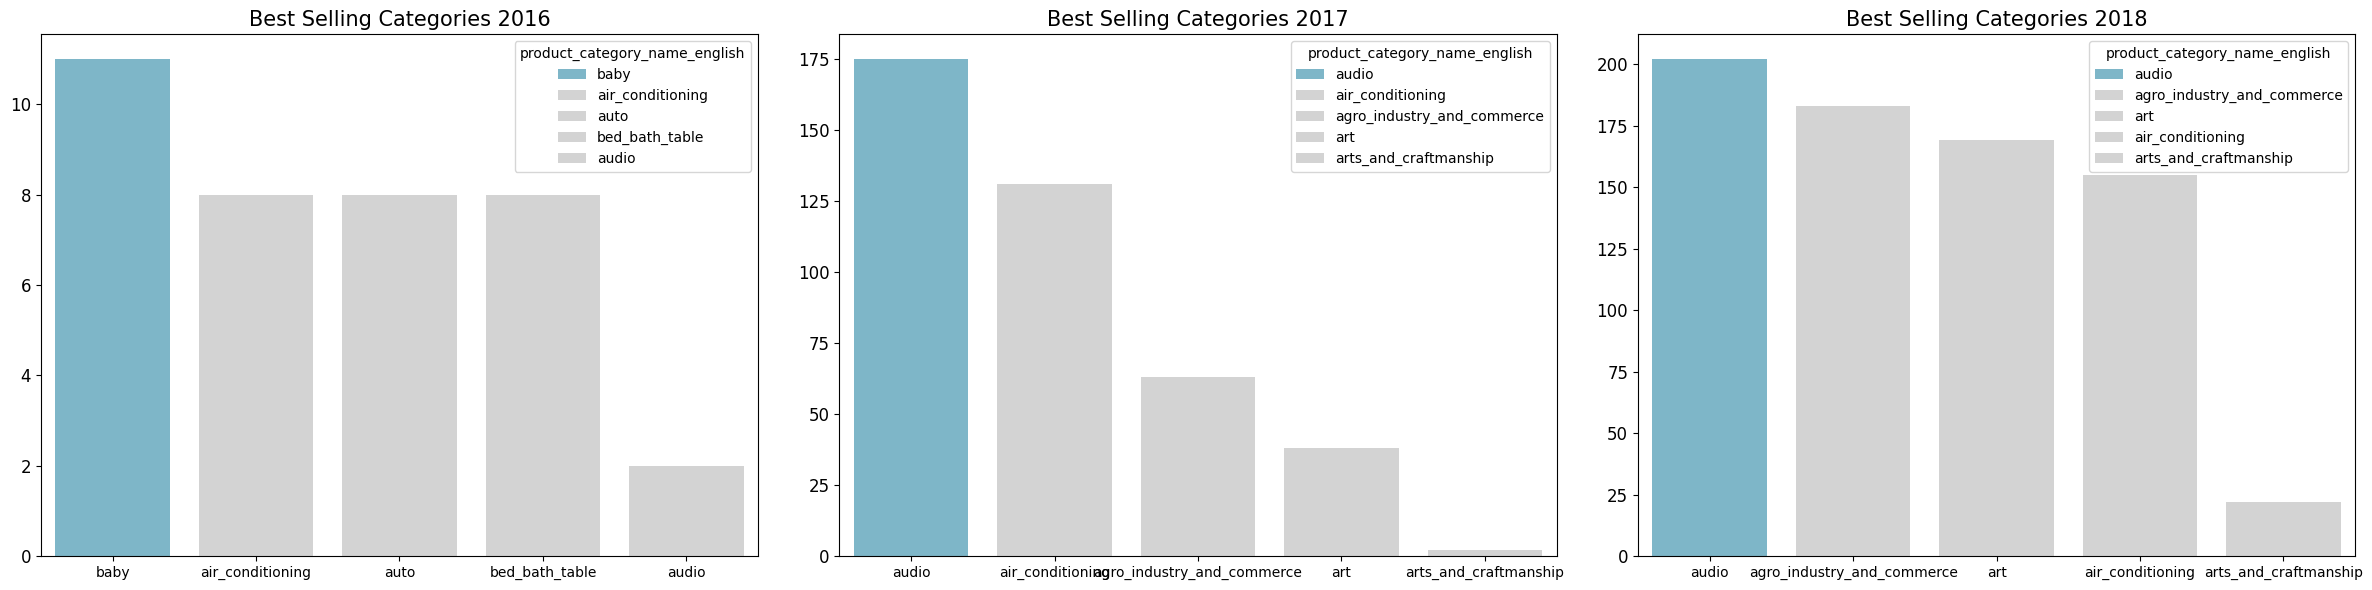

In [118]:
# Membuat Kolom
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(24, 6))

# Mendefinisikan color pallete
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

# Plot 2016
sns.barplot(x="product_category_name_english", y="order_count", hue="product_category_name_english", legend=True, data=top_2016, palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Best Selling Categories 2016", loc="center", fontsize=15)
ax[0].tick_params(axis='y', labelsize=12)

# Plot 2017
sns.barplot(x="product_category_name_english", y="order_count", hue="product_category_name_english", legend=True, data=top_2017, palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Best Selling Categories 2017", loc="center", fontsize=15)
ax[1].tick_params(axis='y', labelsize=12)

# Plot 2018
sns.barplot(x="product_category_name_english", y="order_count", hue="product_category_name_english", legend=True, data=top_2018, palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Best Selling Categories 2018", loc="center", fontsize=15)
ax[2].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

**Insight:**
- Pada tahun 2016 kategori yang paling laris yaitu baby
- Pada tahun 2017 kategori yang paling laris yaitu audio
- Pada tahun 2018 kategori yang paling laris yaitu audio
- Penjualan relatif meningkat dari tahun ke tahun

### Pertanyaan 2: Rentang waktu khusus (contoh: pagi, siang, sore) dimana terjadi banyak pembelian

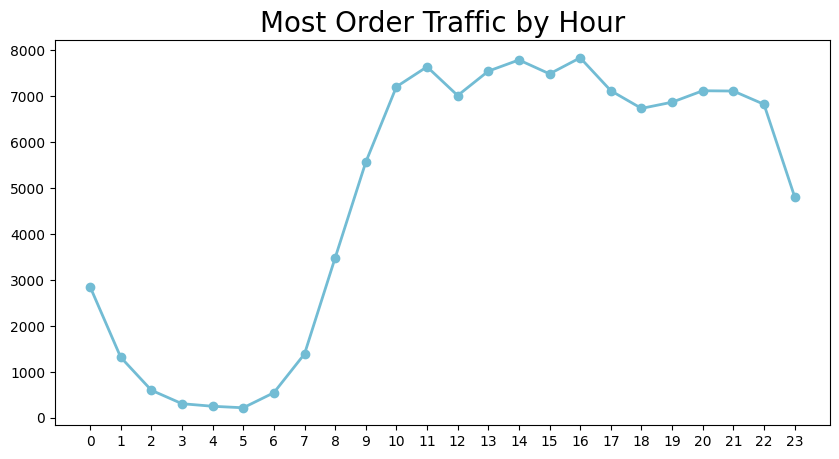

In [73]:
plt.figure(figsize=(10, 5))
plt.plot(
    order_count_by_hour["order_hour"],
    order_count_by_hour["order_count"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Most Order Traffic by Hour", loc="center", fontsize=20)
plt.xticks(range(24),fontsize=10)
plt.yticks(fontsize=10)
plt.show()

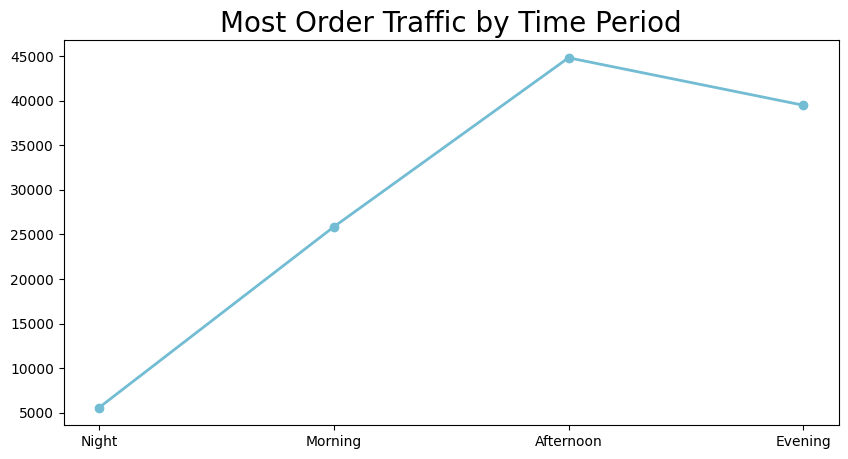

In [74]:
plt.figure(figsize=(10, 5))
plt.plot(
    order_count_by_period["order_period"],
    order_count_by_period["order_count"],
    marker='o', 
    linewidth=2,
    color="#72BCD4"
)
plt.title("Most Order Traffic by Time Period", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

**Insight:**
- Aktifitas pembelian paling banyak terjadi pada pukul 10.00 hingga 22.00
- Berdasarkan periode, waktu yang paling banyak terjadi order yaitu pada siang hari

### Pertanyaan 3: Lokasi manakah yang paling banyak melakukan pembelian?

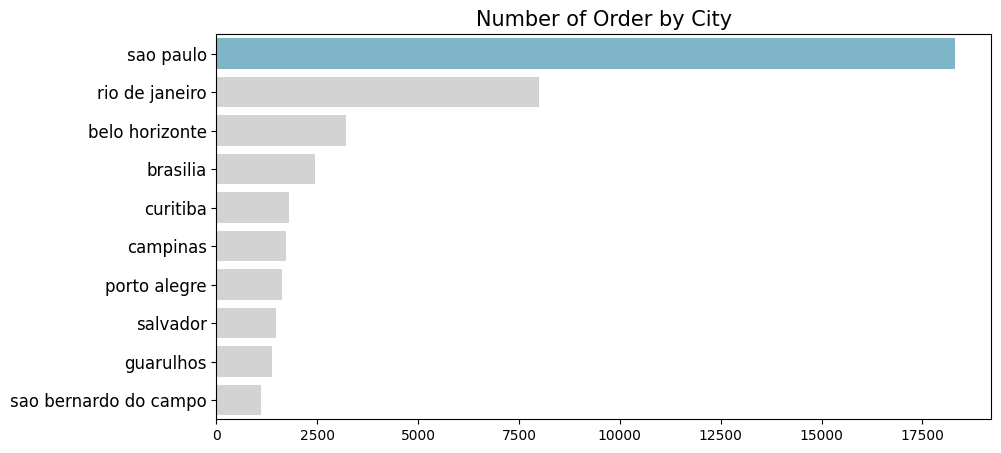

In [75]:
# Mengganti nama kolom
count_order_by_city.rename(columns={
    "customer_city": "city"
}, inplace=True)

# Membuat grafik
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="order_count", 
    y="city",
    hue="city",
    legend=False,
    data=count_order_by_city.sort_values(by="order_count", ascending=False).head(10),
    palette=colors_
)
plt.title("Number of Order by City", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

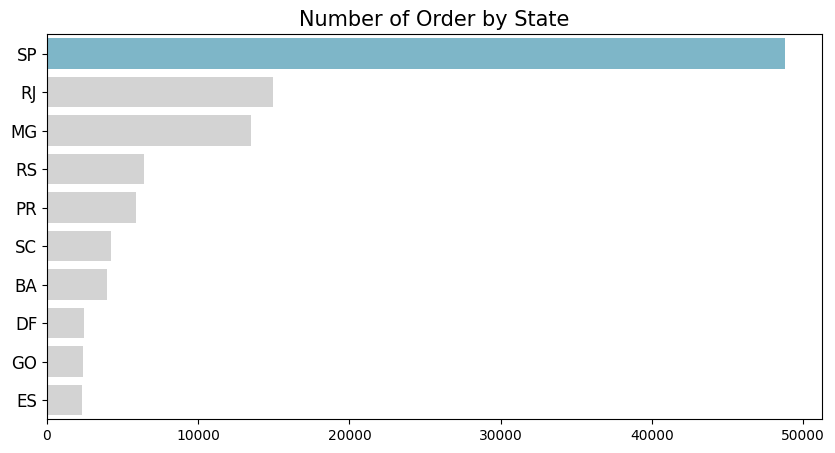

In [76]:
# Mengganti nama kolom
count_order_by_state.rename(columns={
    "customer_state": "state"
}, inplace=True)

# Membuat grafik
plt.figure(figsize=(10, 5))
colors_ = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]
sns.barplot(
    x="order_count", 
    y="state",
    hue="state",
    legend=False,
    data=count_order_by_state.sort_values(by="order_count", ascending=False).head(10),
    palette=colors_
)
plt.title("Number of Order by State", loc="center", fontsize=15)
plt.ylabel(None)
plt.xlabel(None)
plt.tick_params(axis='y', labelsize=12)
plt.show()

**Insight:**
- Berdasarkan kota, lokasi yang paling banyak terjadi order yaitu kota Sao Paulo, SP
- Berdasarkan wilayah, lokasi yang paling banyak terjadi order yaitu Sao Paulo (SP)

### Pertanyaan 4: Bagaimana performa penjualan beberapa waktu terakhir? 

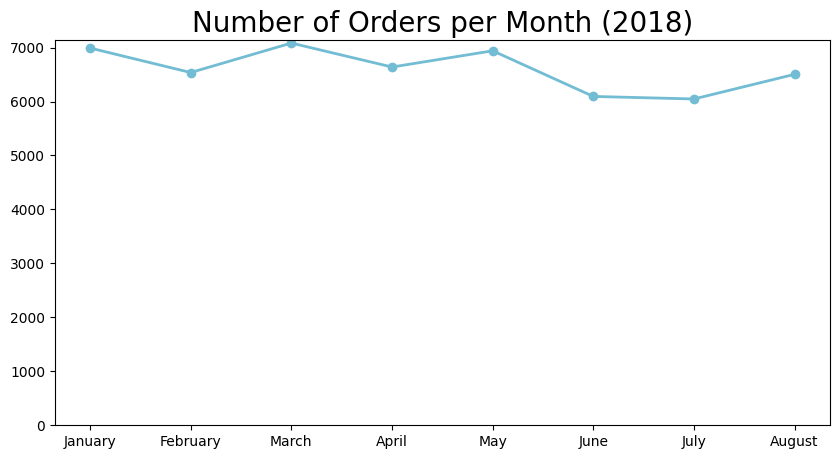

In [114]:
# Membuat grafik jumlah order per bulan
plt.figure(figsize=(10, 5)) 
plt.plot(monthly_orders_df["month"], monthly_orders_df["order_count"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Number of Orders per Month (2018)", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10)
plt.ylim(bottom=0) 
plt.show()

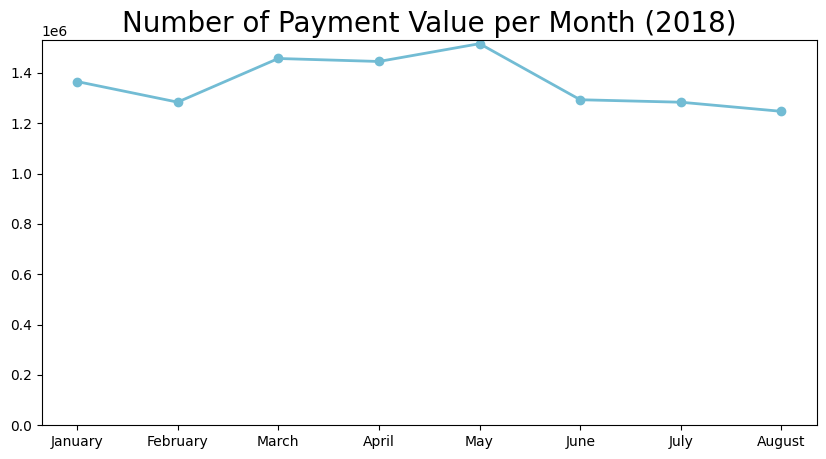

In [115]:
# Membuat grafik jumlah pembayaran per bulan
plt.figure(figsize=(10, 5)) 
plt.plot(monthly_orders_df["month"], monthly_orders_df["payment_value"], marker='o', linewidth=2, color="#72BCD4") 
plt.title("Number of Payment Value per Month (2018)", loc="center", fontsize=20) 
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.ylim(bottom=0) 
plt.show()

**Insight:**
- Jumlah transaksi pembelian bulan terakhir (Agustus) sudah mengalami kenaikan dari bulan sebelumnya (Juli)
- Penjualan dalam 3 bulan terakhir mengalami penurunan drastis dari pada bulan Mei

## Analisis Lanjutan (Siapakah Pembeli Terbaik berdasarkan RFM Analysis)

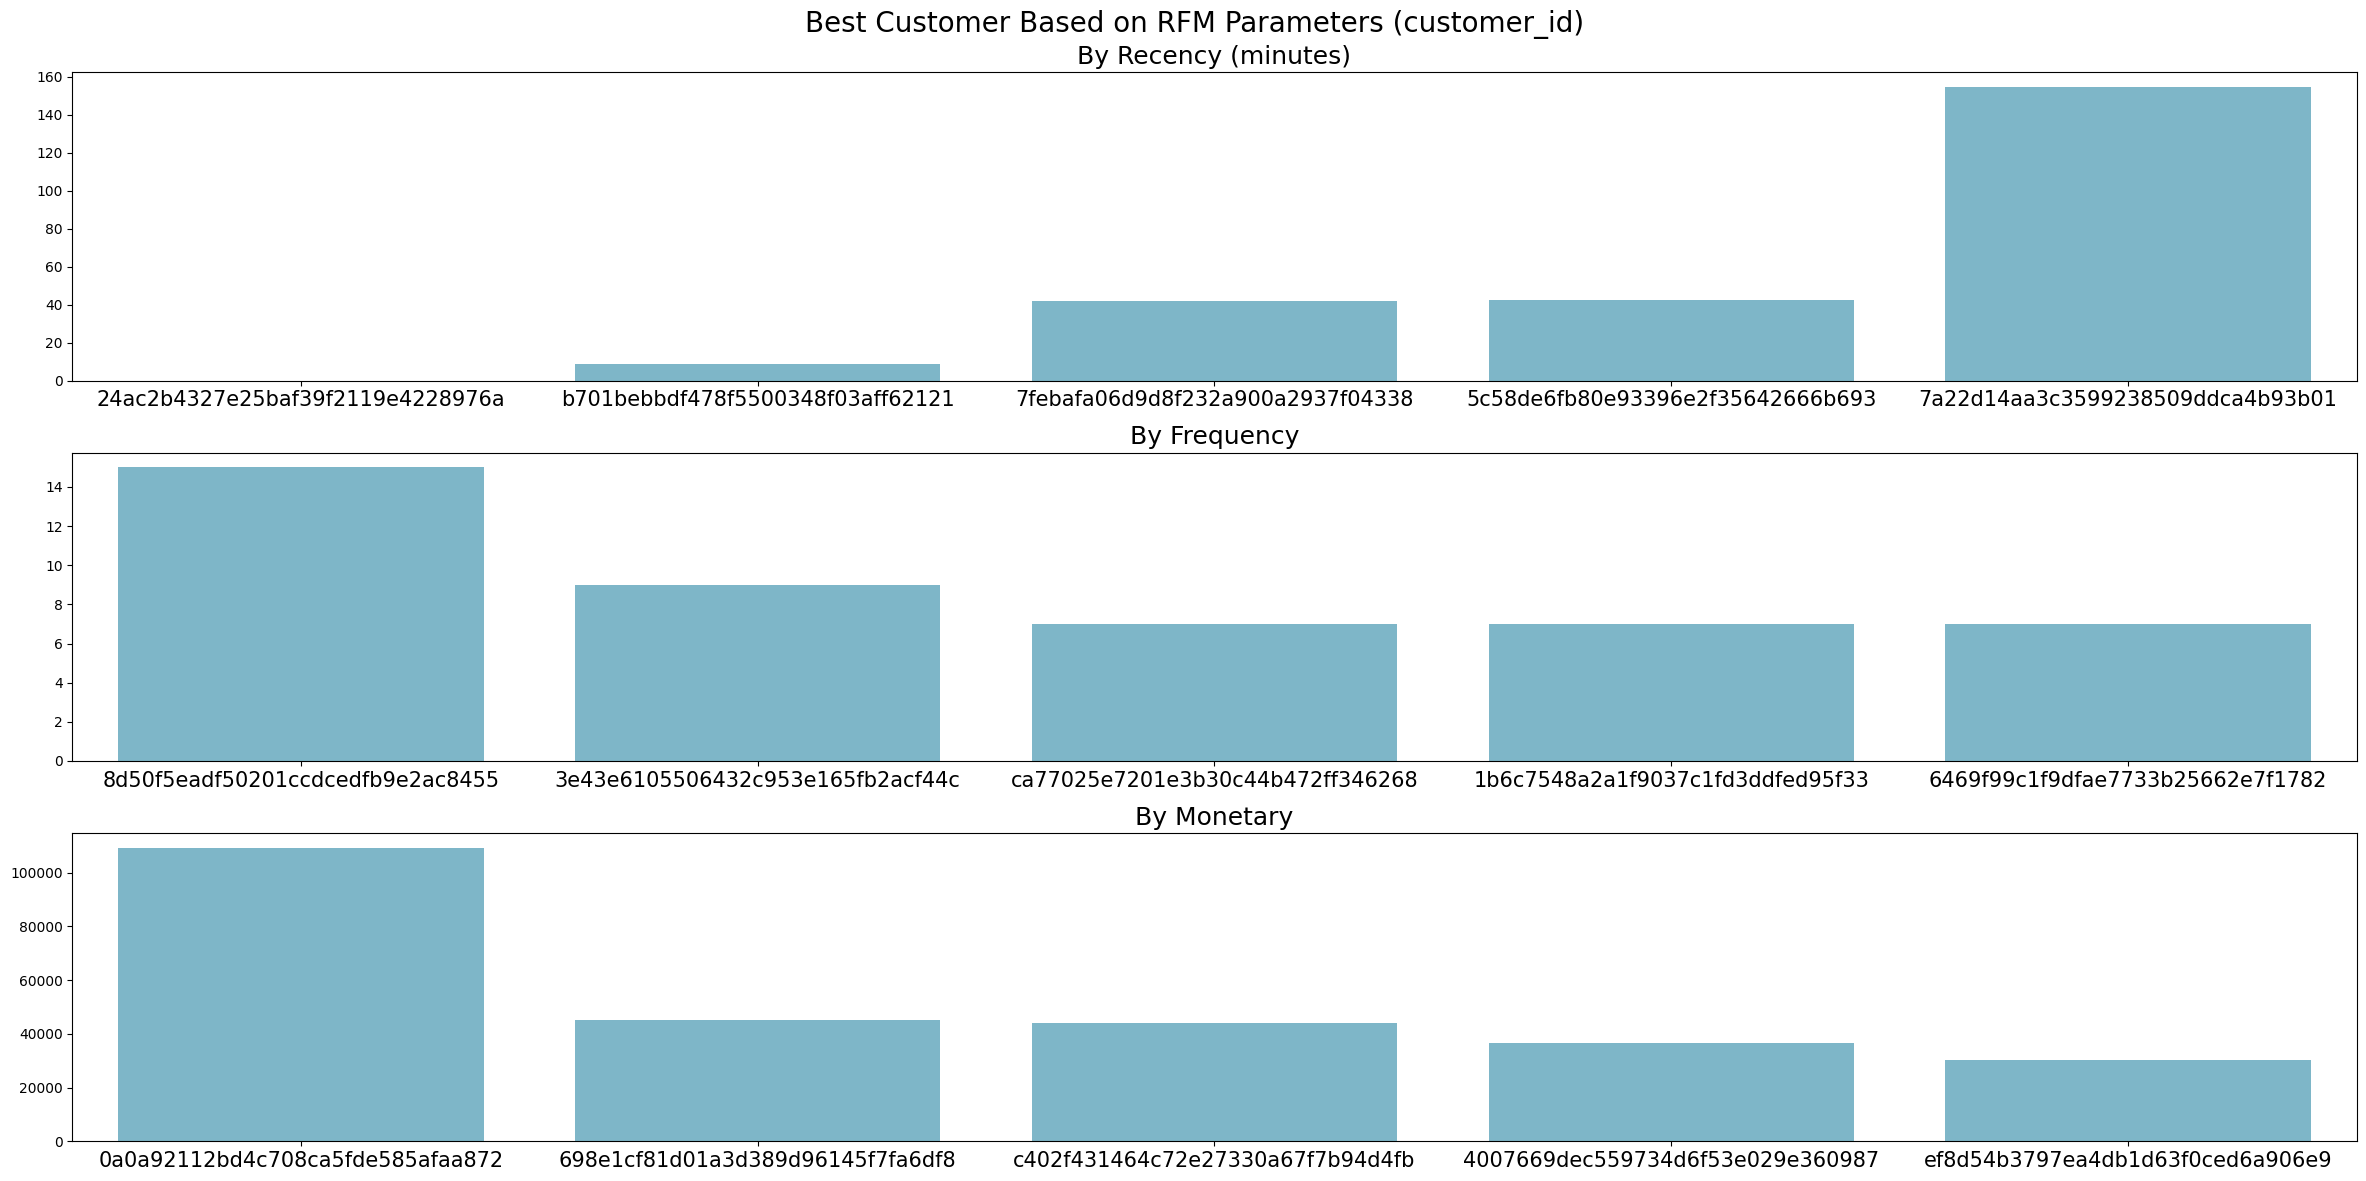

In [113]:
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(24, 12))
 
colors = ["#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4", "#72BCD4"]
 
sns.barplot(y="recency_minute", x="customer_id", hue="customer_id", legend = False, data=rfm_df.sort_values(by="recency_minute", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("By Recency (minutes)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="frequency", x="customer_id", hue="customer_id", legend = False, data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="monetary", x="customer_id", hue="customer_id", legend = False, data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.tight_layout()
plt.show()

**Insight:**
- Pembeli yang melakukan transaksi terakhir yaitu 24ac2b4327e25baf39f2119e4228976a
- Pembeli yang paling sering melakukan pembelian yaitu 8d50f5eadf50201ccdcedfb9e2ac8455 yaitu sebanyak 15 kali.
- Pembeli yang melakukan pembayaran terbanyak yaitu 0a0a92112bd4c708ca5fde585afaa872 senilai 109312.64. 

## Conclusion

- Kategori yang paling laris pada 2016 yaitu produk bayi, kemudian tahun 2017 dan 2018 dipegang oleh audio
- Rentang waktu yang paling banyak terjadi order yaitu siang hari (pukul 12.00 - 18.00) dan pada pukul 10.00 hingga 22.00
- Lokasi yang paling banyak melakukan pembelian yaitu wilayah SP terutama di kota Sao Paulo (SP)
- Performa penjualan dalam bulan terakhir dalam segi jumlah penjualan sudah meningkat, namun jumlah pendapatan menurun
- Melalui analisis lanjutan, diketahui banyak pengguna yang melakukan transaksi terakhir yaitu 24ac2b4327e25baf39f2119e4228976a, jumlah transaksi terbanyak yang dilakukan yaitu 15 kali, dan jumlah pembayaran terbanyak yaitu 109312.64. 